In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
dataset=pd.read_csv('updated_pollution_dataset.csv')

In [103]:
dataset.sample(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Industrial_Areas,Population_Density,Air Quality
730,37.7,78.2,9.2,18.9,35.2,9.7,1.49,5.3,318,Moderate
516,22.8,73.0,0.6,5.4,24.1,4.2,0.87,10.6,381,Good
4677,22.8,66.7,21.5,34.5,29.1,7.5,1.74,5.3,346,Moderate


In [104]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         5000 non-null   float64
 1   Humidity            5000 non-null   float64
 2   PM2.5               5000 non-null   float64
 3   PM10                5000 non-null   float64
 4   NO2                 5000 non-null   float64
 5   SO2                 5000 non-null   float64
 6   CO                  5000 non-null   float64
 7   Industrial_Areas    5000 non-null   float64
 8   Population_Density  5000 non-null   int64  
 9   Air Quality         5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [106]:
dataset['Temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Temperature
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [107]:
print(dataset.isnull().sum())

Temperature           0
Humidity              0
PM2.5                 0
PM10                  0
NO2                   0
SO2                   0
CO                    0
Industrial_Areas      0
Population_Density    0
Air Quality           0
dtype: int64


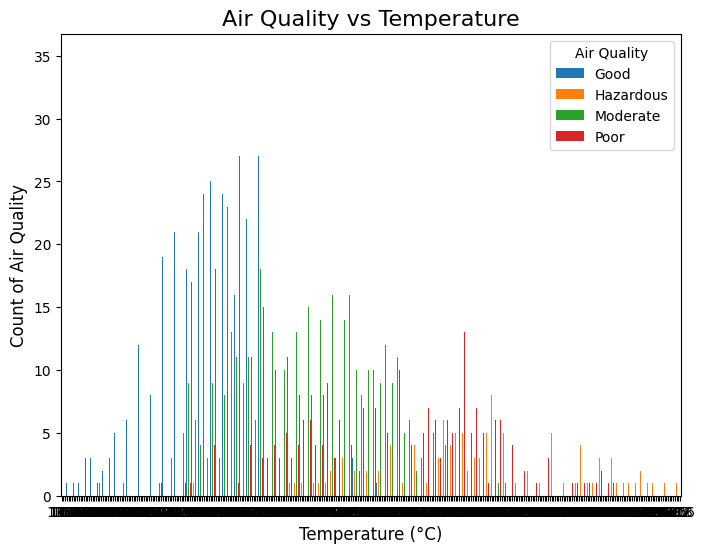

In [108]:
plots=dataset.groupby(['Temperature','Air Quality']).size().unstack(fill_value=0)
plots.plot(kind='bar', figsize=(8,6))
plt.title("Air Quality vs Temperature", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Count of Air Quality", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.legend(title="Air Quality", fontsize=10)
plt.show()

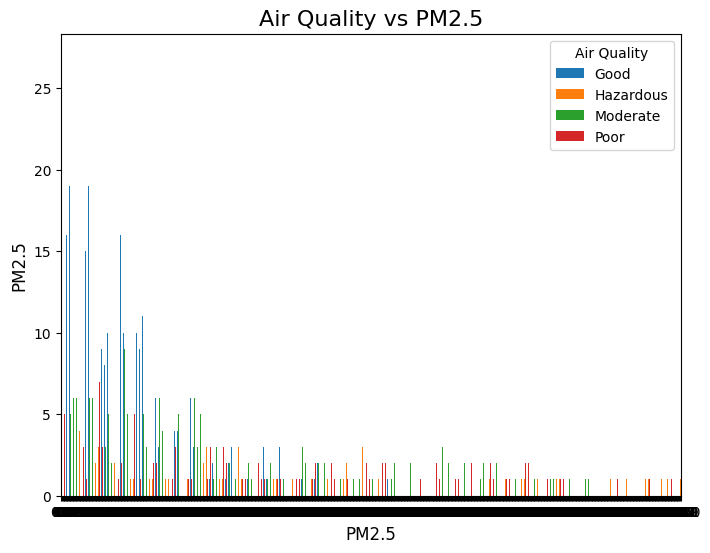

In [109]:
plots=dataset.groupby(['PM2.5','Air Quality']).size().unstack(fill_value=0)
plots.plot(kind='bar', figsize=(8,6))
plt.title("Air Quality vs PM2.5", fontsize=16)
plt.xlabel("PM2.5", fontsize=12)
plt.ylabel("PM2.5", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.legend(title="Air Quality", fontsize=10)
plt.show()

In [110]:
dataset['Air Quality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Air Quality
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [111]:
dataset['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [112]:
df=dataset

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Air Quality']=encoder.fit_transform(df['Air Quality'])

In [114]:
df['Air Quality'].value_counts()

Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

In [115]:
category=['Poor','Hazardous','Moderate','Poor']

In [116]:
df.sample(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Industrial_Areas,Population_Density,Air Quality
4941,27.5,71.0,52.1,64.1,22.0,6.7,1.65,6.6,601,2
3810,40.6,51.7,18.8,31.5,30.4,9.5,2.15,3.4,738,3
4430,29.7,70.4,6.0,8.6,17.4,3.2,1.42,8.5,586,2


In [117]:
cor=df.corr()

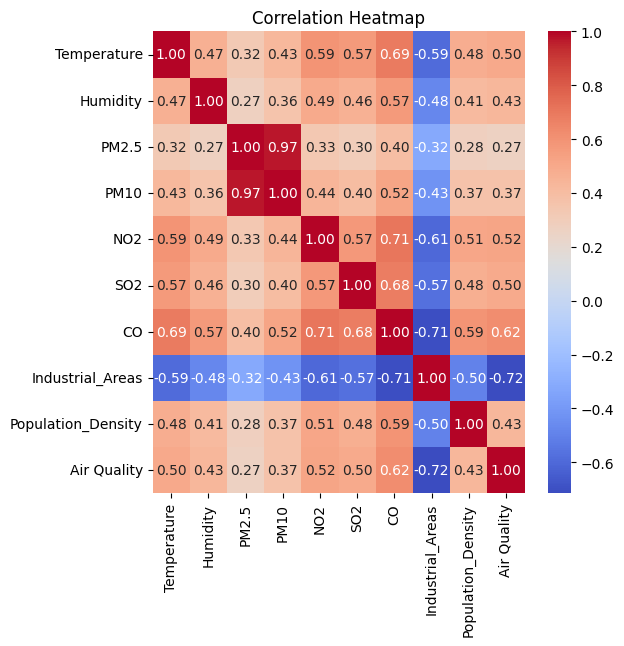

In [118]:
plt.figure(figsize=(6, 6))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [119]:
X=df.drop('Air Quality', axis='columns')

In [120]:
y=df['Air Quality']

In [121]:
X.sample(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Industrial_Areas,Population_Density
1466,45.5,67.6,51.4,64.5,36.9,9.4,1.93,4.2,467
630,32.5,75.0,55.6,61.0,29.6,9.7,1.70,5.8,455
3583,23.6,45.6,2.5,8.8,22.3,5.0,0.81,11.9,463


In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Industrial_Areas','Population_Density']]=scaler.fit_transform(X[['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Industrial_Areas','Population_Density']])

In [123]:
X.sample(3)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Industrial_Areas,Population_Density
3857,2.421281,1.320382,0.279319,0.785536,1.224121,1.508999,1.171573,-1.197978,0.828710
4414,0.873659,0.708857,-0.466035,-0.022612,2.438359,3.879500,2.160634,-0.533266,0.560278
600,0.962945,1.276251,-0.612662,0.050524,0.167284,0.071882,1.134941,-0.921015,0.867993


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [133]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
ypred1=model1.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print(accuracy_score(y_test, ypred1))

0.9145454545454546


In [149]:
cm1=confusion_matrix(y_test, ypred1)

In [150]:
cm1

array([[667,   0,   3,   0],
       [  0, 134,   1,  34],
       [  4,   1, 442,  39],
       [  0,  37,  22, 266]], dtype=int64)

In [144]:
import numpy as np
user_data = np.array([[24.2,64.4,1.1,7.2,11.7,8.6,1.08,10.9,239]])

user_data_scaled = scaler.transform(user_data)

predicted_class = model1.predict(user_data_scaled)
print(predicted_class)

[0]


c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [145]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [146]:
ypred2=model2.predict(X_test)

In [148]:
print(accuracy_score(y_test, ypred2))

0.9436363636363636


In [151]:
cm2=confusion_matrix(y_test, ypred1)
cm2

array([[667,   0,   3,   0],
       [  0, 134,   1,  34],
       [  4,   1, 442,  39],
       [  0,  37,  22, 266]], dtype=int64)

In [152]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(X_train, y_train)

SVC()

In [153]:
ypred3=model3.predict(X_test)

In [154]:
print(accuracy_score(y_test, ypred3))

0.9418181818181818


In [155]:
cm3=confusion_matrix(y_test, ypred3)
cm3

array([[670,   0,   0,   0],
       [  0, 141,   0,  28],
       [  1,   0, 465,  20],
       [  0,  22,  25, 278]], dtype=int64)

<Axes: >

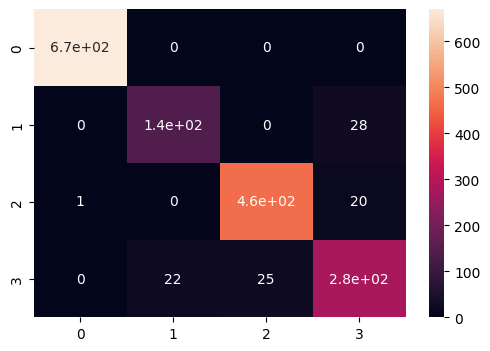

In [157]:
cmx=cm1
fig, ax=plt.subplots(figsize=(6,4))
sns.heatmap(cm3, annot=True, ax=ax)

In [166]:
def prediction(x):
    user_data = np.array(x)
    user_data_scaled = scaler.transform(user_data)
    predicted_1 = model1.predict(user_data_scaled)
    predicted_2=model2.predict(user_data_scaled)
    predicted_3=model3.predict(user_data_scaled)
    print('model 01 prediction',predicted_1)
    print('model 02 prediction',predicted_2)
    print('model 02 prediction',predicted_3)

In [167]:
x=[[24.2,64.4,1.1,7.2,11.7,8.6,1.08,10.9,239]]
prediction(x)

model 01 prediction [0]
model 02 prediction [0]
model 02 prediction [0]


c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
